In [36]:
# Import libraries
import numpy as np
import pandas as pd

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
from sklearn.metrics import mean_absolute_error
print(tf.__version__)

2.7.0


In [37]:
# Read in small dataset
meth = pd.read_csv('meth_merged_small.csv')

In [38]:
meth.head()

,meth_id,meth_id.1,Endometriosis,Cycle_Phase,Stage,Institute,Batch,cg21870274,cg09499020,cg16535257,...,cg17153432,cg00113194,cg02968844,cg16248916,cg20322444,cg01394461,cg09555360,cg07701223,cg16608242,cg21830050
0,201904640089_R01C01,201904640089_R01C01,Yes,PE,III-IV,"IMB, UQ",1,2.039036,-0.721799,-0.411768,...,2.773698,1.420255,2.749763,3.263263,1.921350,1.388495,2.775411,3.004400,4.253018,2.935569
1,201904640089_R02C01,201904640089_R02C01,No,PE,CONTROL,UCSF,1,1.960953,-0.483177,-0.821167,...,2.147846,1.356343,2.643704,3.314683,1.785078,1.599123,3.092374,3.474082,4.671594,3.087222
2,201904640089_R03C01,201904640089_R03C01,Yes,SE,III-IV,UCSF,1,2.091686,-0.779545,-1.158785,...,2.436249,1.724266,2.461790,2.855318,1.585979,1.318879,2.888255,2.582067,4.569804,3.002670
3,201904640089_R04C01,201904640089_R04C01,Yes,SE,I-II,"IMB, UQ",1,2.681174,-0.641505,-0.856451,...,2.330939,1.625036,2.861133,3.584844,1.972525,1.272687,2.771981,2.859650,4.437911,2.710566
4,201904640089_R05C01,201904640089_R05C01,No,PE,CONTROL,"IMB, UQ",1,1.765793,-1.132911,-0.136729,...,2.515127,1.605927,2.596237,3.157005,1.748679,1.407672,2.765344,3.176926,4.685812,2.794114


In [41]:
# Set axis to IDs
meth.set_axis(meth['meth_id'], inplace = True)

In [43]:
# Drop the ID cols 
cols_drop = ['meth_id', 'meth_id.1']
meth.drop(columns=cols_drop, inplace = True)

In [44]:
# Change Endo Yes/No to binary
meth['Endometriosis_int'] = np.where(meth['Endometriosis'] == 'Yes', 1, meth['Endometriosis'])
meth['Endometriosis_int'] = np.where(meth['Endometriosis_int'] == 'No', 0, meth['Endometriosis_int'])

In [45]:
# Split dataset into features and target 
x = meth.iloc[:, np.r_[5:99]]
y = meth['Endometriosis_int']

In [47]:
import pandas as pd 
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import r2_score
import itertools 
from itertools import chain
from sklearn.model_selection import train_test_split
import scipy 
from scipy.stats import linregress
# Cross-Validate
#kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
oos_y = []
oos_pred = []

train_y = []
train_pred_y = []

activation1 = 'relu'
activation2 = 'relu'

fold = 0
#for train, test in kf.split(x):
for i in range(5):
    fold+=1
    print(f"Fold #{fold}")
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
    
    # Convert to float32
    x_train = np.asarray(x_train).astype('float32')
    y_train = np.asarray(y_train).astype('float32')
    x_test = np.asarray(x_test).astype('float32')
    y_test = np.asarray(y_test).astype('float32')
    
    # build model
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1], activation = activation1))
    model.add(Dense(100, activation= activation1))
    model.add(Dense(100, activation=activation1))
    model.add(Dense(100, activation=activation1))
    model.add(Dense(100, activation=activation1))
    model.add(Dense(100, activation=activation1))
    model.add(Dense(100, activation=activation1))
    model.add(Dense(100, activation=activation1))
    model.add(Dense(100, activation=activation2))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer=tf.optimizers.Adamax(0.0001), metrics=['mae'])

    # Training
    history = model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,
              epochs=500)
    
    train_pred = model.predict(x_train)
    
    #Prediction
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    oos_pred.append(pred)
    
    train_y.append(y_train)
    train_pred_y.append(train_pred)
    #print(y_test)
    #print(pred)

    # Measure this fold's MAE
    train_score = np.sqrt(metrics.mean_absolute_error(train_pred, y_train))
    #R2_train = r2_score(train_pred, y_train)
    r_val = np.corrcoef(train_pred.flatten(), y_train.flatten())
    R2_train = str(r_val[0, 1]**2)
    print(f"Train score (R2): {R2_train}")
    print(f"Train score (MAE): {train_score}")
    
    
    score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
    #R2 = r2_score(pred, y_test)
    r_val = np.corrcoef(pred.flatten(), y_test.flatten())
    R2 = str(r_val[0, 1]**2)
    print(f"Test score (R2): {R2}")
    print(f"Test score (MAE): {score}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)


train_y = np.concatenate(train_y)
train_pred_y = np.concatenate(train_pred_y)


train_score = np.sqrt(metrics.mean_absolute_error(train_y, train_pred_y))
r_val = np.corrcoef(train_y, train_pred_y.flatten())
R2_train = str(r_val[0, 1]**2)
print(f"Train score Final (R2): {R2_train}")
print(f"Train score Final (MAE): {train_score}")

# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)

score = np.sqrt(metrics.mean_absolute_error(oos_pred,oos_y))
r_val = np.corrcoef(oos_y[0], oos_pred[0])
R2 = str(r_val[0, 1]**2)
print(f"Final, out of sample score (R2): {R2}")
print(f"Final, out of sample score (MAE): {score}")    
    

#oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)

Fold #1
Train score (R2): 0.7712025666271011
Train score (MAE): 0.3758791387081146
Test score (R2): 0.10890020707361484
Test score (MAE): 0.5950193405151367
Fold #2
Train score (R2): 0.7424286444616102
Train score (MAE): 0.374164879322052
Test score (R2): 0.18455890102116473
Test score (MAE): 0.7829753756523132
Fold #3
Train score (R2): 0.9009016854323092
Train score (MAE): 0.2415551096200943
Test score (R2): 0.09788734483146953
Test score (MAE): 0.6170359253883362
Fold #4
Train score (R2): 0.712209285566221
Train score (MAE): 0.39045241475105286
Test score (R2): 5.3980982829050046e-05
Test score (MAE): 0.6438983082771301
Fold #5
Train score (R2): 0.8540305660846361
Train score (MAE): 0.3033837378025055
Test score (R2): 0.040974639781687354
Test score (MAE): 0.6773735880851746
Train score Final (R2): 0.7950362792192281
Train score Final (MAE): 0.3417976498603821
Final, out of sample score (R2): 0.012036605891420688
Final, out of sample score (MAE): 0.6665241122245789


In [48]:
train_pred_y = train_pred_y.flatten()

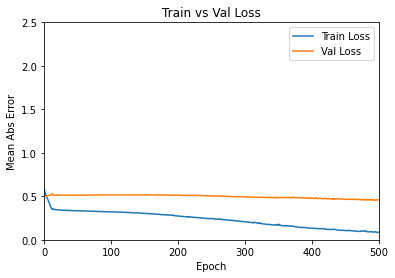

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.title('Train vs Val Loss')
plt.legend()
plt.ylim([0, 2.5])
plt.xlim([0, 500])
plt.show()
#fig.savefig(activation1 + '_' + activation2 + '_' + 'train_loss.png', dpi=400)

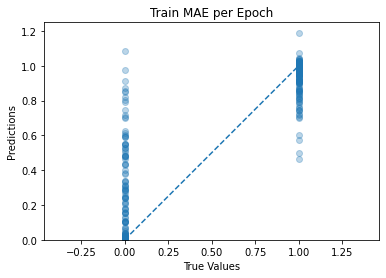

In [50]:
plt.scatter(train_y, train_pred_y, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('Train MAE per Epoch')
plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.plot([0, 1], [0,1], '--')
#plt.savefig(activation1 + '_' + activation2 + '_' + 'true_vs_pred_train.png')

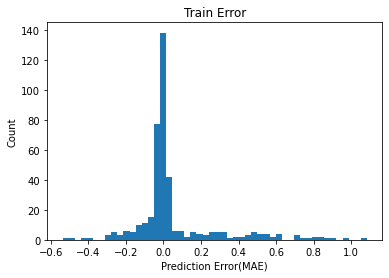

In [51]:
error = train_pred_y - train_y
plt.hist(error, bins = 50)
plt.title('Train Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
#plt.savefig(activation1 + '_' + activation2 + '_' + 'train_error.png')

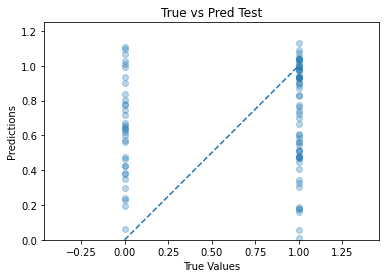

In [52]:
plt.scatter(oos_y, oos_pred, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('True vs Pred Test')
plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.plot([0, 1], [0,1], '--')
#plt.savefig(activation1 + '_' + activation2 + '_' + 'true_vs_pred_test.png')

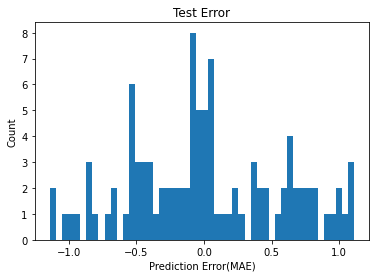

In [53]:
error = oos_pred - oos_y
plt.hist(error, bins = 50)
plt.title('Test Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
#plt.savefig(activation1 + '_' + activation2 + '_' + 'test_error.png')

In [54]:
r_probs = [0 for _ in range(len(oos_y))]

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
#Random chance ROC
r_auc = roc_auc_score(oos_y, r_probs)
r_fpr, r_tpr, _ = roc_curve(oos_y, r_probs)

#Test ROC
fpr, tpr, _ = roc_curve(oos_y, oos_pred)
auc = roc_auc_score(oos_y, oos_pred)


#Train ROC
tr_fpr, tr_tpr, _ = roc_curve(train_y, train_pred_y)
tr_auc = roc_auc_score(train_y, train_pred_y)

In [56]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Test Prediction: AUROC = %.3f' % (auc))
print('Train Prediction: AUROC = %.3f' % (tr_auc))

Random (chance) Prediction: AUROC = 0.500
Test Prediction: AUROC = 0.568
Train Prediction: AUROC = 0.984


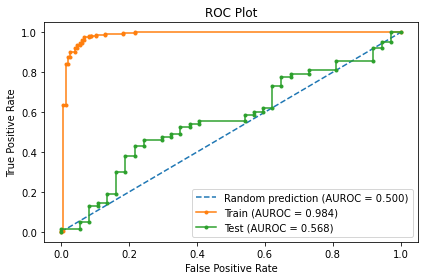

In [57]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(tr_fpr, tr_tpr, marker='.', label='Train (AUROC = %0.3f)' % tr_auc)
plt.plot(fpr, tpr, marker='.', label='Test (AUROC = %0.3f)' % auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'lower right', prop={'size': 10}) 
plt.tight_layout()
#plt.savefig(activation1 + '_' + activation2 + '_' + 'ROC_Curve.png')

In [58]:
test_pred_int = np.where(oos_pred<0.5, 0, 1)
train_pred_int = np.where(train_pred_y<0.5, 0, 1)

In [59]:
from sklearn.metrics import confusion_matrix
test_conf = confusion_matrix(oos_y, test_pred_int)
train_conf = confusion_matrix(train_y, train_pred_int)

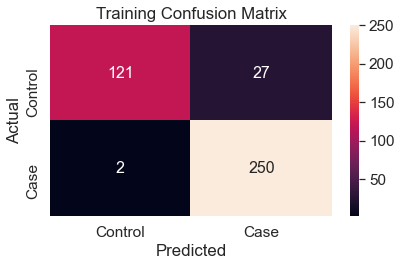

In [60]:
import seaborn as sns
df_cm = pd.DataFrame(train_conf, range(2), range(2))
df_cm = df_cm.rename(index={0: "Control", 1: "Case"})
df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Training Confusion Matrix')
plt.tight_layout()
#plt.savefig(activation1 + '_' + activation2 + '_' + 'confusion_matrix_train.png')

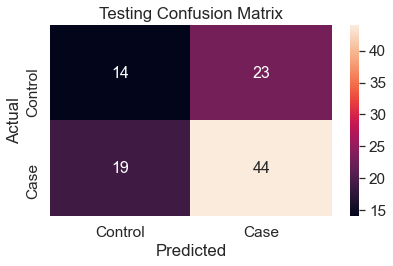

In [61]:
import seaborn as sns
df_cm = pd.DataFrame(test_conf, range(2), range(2))
df_cm = df_cm.rename(index={0: "Control", 1: "Case"})
df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Testing Confusion Matrix')
plt.tight_layout()
#plt.savefig(activation1 + '_' + activation2 + '_' + 'confusion_matrix_test.png')